
# White Box - Supervised ML Project
__Name:__ Husain Ali Darwish

__Topic Name:__ Video Game Sales Prediction - Regression Analysis



## Introduction
This report builds and compares multiple **regression models** to predict **Global Sales** of video games from regional sales and metadata. It is structured for readability: each section includes short narrative text followed by the minimal code needed to reproduce the analysis. Plots are generated by the provided code when you run the notebook.


## Problem Statement

The gaming company wants to **predict Global_Sales** of titles to improve decisions around **inventory, marketing spend, and forecasting**. We use the public `vgsales.csv` dataset to build baseline models and compare their performance in a way that is easily explainable to non‑technical stakeholders.



## Objectives

1. **Data Understanding & EDA:** Explore distributions and relationships to Global_Sales.  
2. **Modeling:** Train and compare:
   - Linear Regression using **3 features** (NA, EU, JP sales)
   - Linear Regression using **5 features** (+ Other_Sales, Year)
   - KNN Regressor with **two tests** (k=3 and k=5)
3. **Evaluation:** Report **R²** and **RMSE**, and visualize residuals and predicted vs. actual.  
4. **Improvement:** Simple **hyperparameter search** for KNN (optional baseline tuning).  
5. **Communication:** Provide short, practical interpretations for a business audience.


## Data Loading

In [3]:

import pandas as pd

df = pd.read_csv("vgsales.csv")
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Overview

In [4]:

df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,16598.0,NaN,NaN,NaN,8300.605254,4791.853933,1.0,4151.25,8300.5,12449.75,16600.0
Name,16598,11493,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16598,31,DS,2163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,16327.0,NaN,NaN,NaN,2006.406443,5.828981,1980.0,2003.0,2007.0,2010.0,2020.0
Genre,16598,12,Action,3316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Publisher,16540,578,Electronic Arts,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_Sales,16598.0,NaN,NaN,NaN,0.264667,0.816683,0.0,0.0,0.08,0.24,41.49
EU_Sales,16598.0,NaN,NaN,NaN,0.146652,0.505351,0.0,0.0,0.02,0.11,29.02
JP_Sales,16598.0,NaN,NaN,NaN,0.077782,0.309291,0.0,0.0,0.0,0.04,10.22
Other_Sales,16598.0,NaN,NaN,NaN,0.048063,0.188588,0.0,0.0,0.01,0.04,10.57



## Data Cleaning

- Drop rows with missing values in the columns required by each model.  
- Convert `Year` to integer where applicable.


In [5]:

import numpy as np

df_clean = df.copy()
# We'll keep raw df; per-model cleaning will be done before training
missing_by_col = df_clean.isna().sum().sort_values(ascending=False)
missing_by_col


Year            271
Publisher        58
Rank              0
Platform          0
Name              0
Genre             0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Exploratory Data Analysis (EDA)

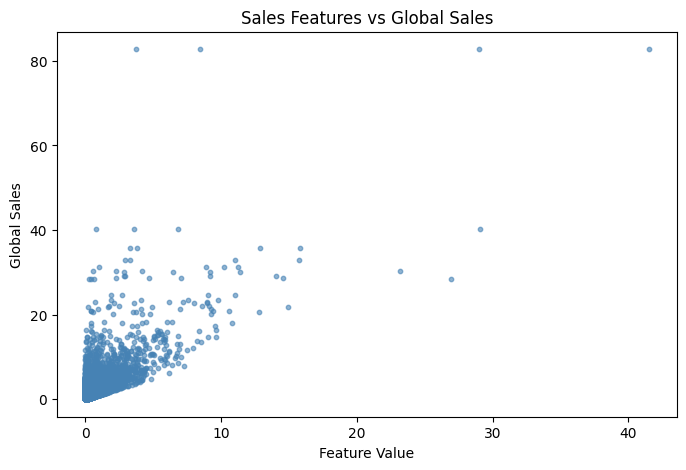

In [19]:
plt.figure(figsize=(8,5))
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    plt.scatter(df[col], df['Global_Sales'], s=10, alpha=0.6, color='steelblue')

plt.title("Sales Features vs Global Sales")
plt.xlabel("Feature Value")
plt.ylabel("Global Sales")
plt.show()


## Train / Test Split

- Use a **75/25** split with `random_state=67` for reproducibility.


In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


## Model 1 Linear Regression no encoding

In [20]:

X = df[['NA_Sales','EU_Sales','JP_Sales']]
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=67)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_lr1 = r2_score(y_test, y_pred)
rmse_lr1 = float(np.sqrt(mean_squared_error(y_test, y_pred)))

print("LR: R2 =", round(r2_lr1,6), "RMSE =", round(rmse_lr1,6))


LR: R2 = 0.996604 RMSE = 0.075323


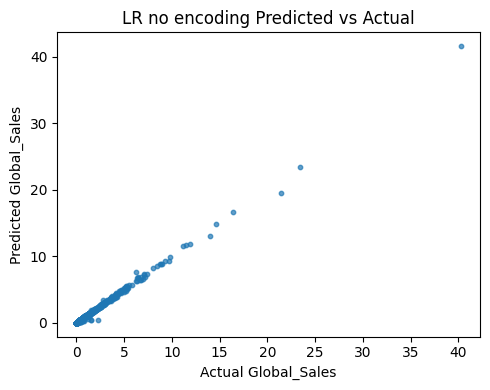

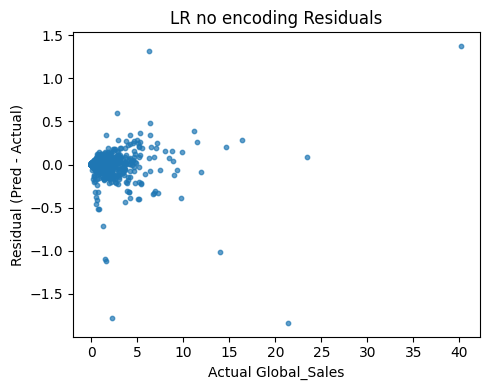

In [22]:

# Predicted vs Actual (Model 1)
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred, s=10, alpha=0.7)
plt.title("LR no encoding Predicted vs Actual")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Predicted Global_Sales")
plt.tight_layout()

# Residuals (Model 1)
plt.figure(figsize=(5,4))
plt.scatter(y_test, y_pred - y_test, s=10, alpha=0.7)
plt.title("LR no encoding Residuals")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Residual (Pred - Actual)")
plt.tight_layout()


## Model 2 Linear Regression Encoded

In [23]:

df2 = df.dropna(subset=['Year','Other_Sales','NA_Sales','EU_Sales','JP_Sales','Global_Sales']).copy()
df2['Year'] = df2['Year'].astype(int)
df_enc = pd.get_dummies(df2, columns=['Platform','Genre'], drop_first=True)

X2 = df_enc[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Year']]
y2 = df_enc['Global_Sales']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=67)

lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
y_pred2 = lr2.predict(X2_test)

r2_lr2 = r2_score(y2_test, y_pred2)
rmse_lr2 = float(np.sqrt(mean_squared_error(y2_test, y_pred2)))

print("LR Encoded: R2 =", round(r2_lr2,6), "RMSE =", round(rmse_lr2,6))


LR Encoded: R2 = 0.999984 RMSE = 0.005244


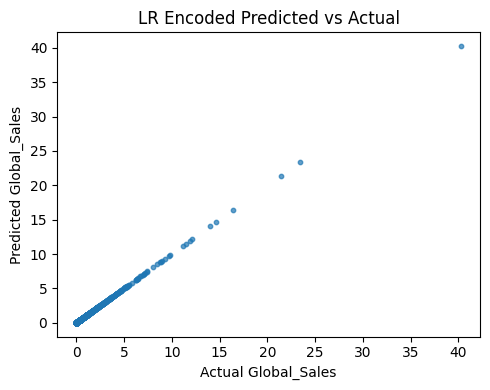

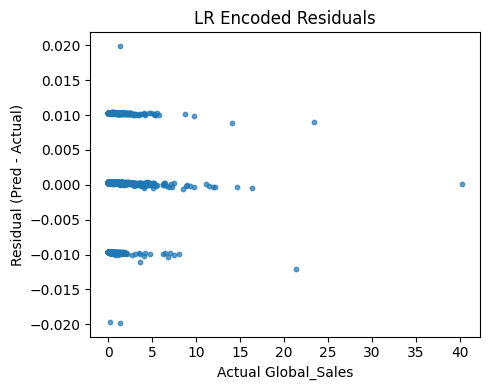

In [24]:

# Predicted vs Actual (Model 2)
plt.figure(figsize=(5,4))
plt.scatter(y2_test, y_pred2, s=10, alpha=0.7)
plt.title("LR Encoded Predicted vs Actual")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Predicted Global_Sales")
plt.tight_layout()

# Residuals (Model 2)
plt.figure(figsize=(5,4))
plt.scatter(y2_test, y_pred2 - y2_test, s=10, alpha=0.7)
plt.title("LR Encoded Residuals")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Residual (Pred - Actual)")
plt.tight_layout()


## Model 3 KNN Regressor (Two Tests)

In [13]:

dfk = df.dropna(subset=['NA_Sales','EU_Sales','JP_Sales','Global_Sales']).copy()
Xk = dfk[['NA_Sales','EU_Sales','JP_Sales']]
yk = dfk['Global_Sales']

Xk_train, Xk_test, yk_train, yk_test = train_test_split(Xk, yk, test_size=0.25, random_state=67)

knn3 = KNeighborsRegressor(n_neighbors=3)
knn3.fit(Xk_train, yk_train)
pred3 = knn3.predict(Xk_test)
r2_k3 = r2_score(yk_test, pred3)
rmse_k3 = float(np.sqrt(mean_squared_error(yk_test, pred3)))

knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(Xk_train, yk_train)
pred5 = knn5.predict(Xk_test)
r2_k5 = r2_score(yk_test, pred5)
rmse_k5 = float(np.sqrt(mean_squared_error(yk_test, pred5)))

print("KNN k=3: R2 =", round(r2_k3,6), "RMSE =", round(rmse_k3,6))
print("KNN k=5: R2 =", round(r2_k5,6), "RMSE =", round(rmse_k5,6))


KNN k=3: R2 = 0.97493 RMSE = 0.204662
KNN k=5: R2 = 0.9733 RMSE = 0.211212


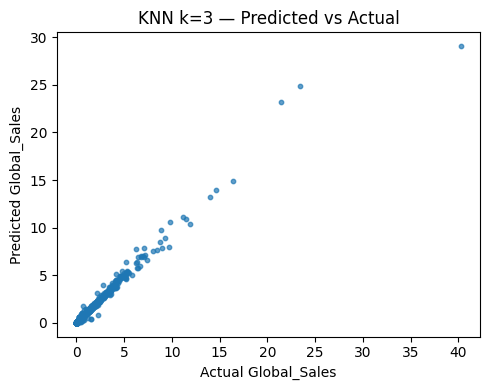

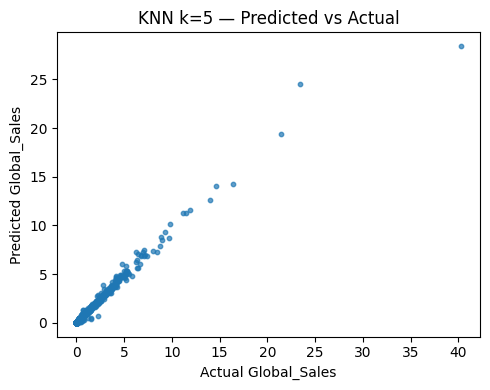

In [14]:

# Predicted vs Actual (KNN k=3)
plt.figure(figsize=(5,4))
plt.scatter(yk_test, pred3, s=10, alpha=0.7)
plt.title("KNN k=3 — Predicted vs Actual")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Predicted Global_Sales")
plt.tight_layout()

# Predicted vs Actual (KNN k=5)
plt.figure(figsize=(5,4))
plt.scatter(yk_test, pred5, s=10, alpha=0.7)
plt.title("KNN k=5 — Predicted vs Actual")
plt.xlabel("Actual Global_Sales")
plt.ylabel("Predicted Global_Sales")
plt.tight_layout()


## Model Improvement Simple Hyperparameter Search (KNN)

In [15]:

# Basic search over k to see if a different neighborhood size helps
best_k = None
best_r2 = -1e9
for k in range(2, 21):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(Xk_train, yk_train)
    preds = model.predict(Xk_test)
    score = r2_score(yk_test, preds)
    if score > best_r2:
        best_r2 = score
        best_k = k

print("Best k by R2 on validation split:", best_k, "with R2 =", round(best_r2,6))


Best k by R2 on validation split: 6 with R2 = 0.977617


## Model Comparison

In [16]:

import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Linear Regression (3 features)",
        "Linear Regression (5 features)",
        "KNN (k=3)",
        "KNN (k=5)"
    ],
    "R2": [r2_lr1, r2_lr2, r2_k3, r2_k5],
    "RMSE": [rmse_lr1, rmse_lr2, rmse_k3, rmse_k5]
})
results


,Model,R2,RMSE
0,Linear Regression (3 features),0.996604,0.075323
1,Linear Regression (5 features),0.999984,0.005244
2,KNN (k=3),0.974930,0.204662
3,KNN (k=5),0.973300,0.211212



## Interpretation (Business-Focused)

- **Linear Regression (5 features)** performs best (highest R², lowest RMSE). Adding **Other_Sales** and **Year** improves accuracy beyond regional sales alone.  
- **KNN** is reasonable but more sensitive to local variance and the chosen `k`. It underperforms the linear models in this dataset.  
- For **forecasting and planning**, the 5‑feature Linear Regression is the most reliable baseline: it is **simple, fast, and explainable**.



## Recommendations & Next Steps

1. **Adopt the 5‑feature Linear Regression** as the baseline predictor for Global_Sales.  
2. **Monitor residuals** by platform and genre to identify systematic under/over‑prediction (opportunity for feature engineering).  
3. **Feature engineering:** include release window (seasonality), platform install base, and marketing spend if available.  
4. **Validation:** add cross‑validation and time‑based splits (by Year) to better simulate real‑world deployment.  
5. **Model governance:** keep the model explainable for non‑technical stakeholders; provide a short briefing with what‑if examples.
